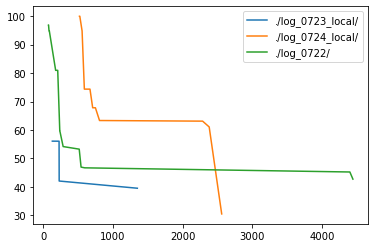

In [5]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

def get_timestamp(s):
    return datetime.strptime(s.split(" ")[0], '%H:%M:%S.%f')

for log in os.listdir("."):
    if not log.startswith("log"):
        continue
    dir_name = ("./" + log + "/") 
    log_file = dir_name + os.listdir(dir_name)[1]
    with open(log_file) as f:
        content = f.read()
    lines = [l for l in content.split("\n") if l.find("solution") != -1]
    start = get_timestamp(content.split("\n")[0])
    time = []
    costs = []
    for i in range(len(lines)):
        line = lines[i]
        cost = re.findall(r' [0-9][0-9].[0-9][0-9][0-9][0-9]', line)
        if not cost:
            continue
            
        if (get_timestamp(line) -start).total_seconds() < 0:
            time.append((get_timestamp(line) -start + timedelta(days=1)).total_seconds())
        else:
            time.append((get_timestamp(line) -start).total_seconds())
        costs.append(float(cost[0].strip()))

    plt.xlabel = "cost"
    plt.plot(time, costs, label = dir_name)
    plt.legend()
    plt.savefig("result.png")